За изработката на ова решение ќе се користат податоци кои претходно ќе се извлечат од соодветно избраниот веб-сајт https://koronavirus.gov.mk/. За таа цел се користат библиотеки на Python за data scraping и data crawling.

### 1. СОБИРАЊЕ ПОДАТОЦИ

Потребните податоци на веб-сајтот се распоредени низ повеќе известувања (новости) во период од 15.03.2020 до 12.05.2020. Може да се забележи дека ваквите известувања се распоредени на вкупно 14 pages. Со следната ќелија код се зачувуваат сите pages на кои се наоѓаат потребните податоци за подоцна да може да ги прелистуваме и да го влечиме потребното од нив. 

In [1]:
websites=[]
for i in range (1,15):
    websites.append('https://koronavirus.gov.mk/vesti/category/izvestuvanja/page/' + str(i))
#print(websites)

За влечење на потребните податоци се користи пакетот Selenium. Информациите за COVID19 (новозаболени, оздравени, починати и вкупно дијагностицирани) може да се најдат во .alt атрибутот на img елементите на веб-сајтот. На сличен начин, се наоѓа и соодветниот датум за секоја новост. Со соодветен код се естрахираат податоците од сите слики на новостите.

In [2]:
from selenium import webdriver
import pandas as pd
driver = webdriver.Chrome("C:\\Users\\Ena\\Downloads\chromedriver.exe")
images_alt=[]
dates_all=[]

for i in range(0,14):
    url = (websites[i])
    driver.get(url)
    images = driver.find_elements_by_css_selector('div.et_pb_image_container > a > img')
    
    for i in range (len(images)):
        #print(images[i].get_attribute("alt"))
        images_alt.append(images[i].get_attribute("alt"))
        
    dates_elements = driver.find_elements_by_css_selector('div.et_pb_image_container + h2.entry-title + p > span.published')
    for date in dates_elements:
        date_text=date.text.split("|")[0]
        dates_all.append(date_text)


Со кодот во следната ќелија се селектираат само потребните информации. Тука се вклучени сите информации кои ги содржат зборовите: дијагностициран, вкупно, оздравен, починат и слично.
Ваквите информации немаат слична структура и поради тоа нивното селектирање е малку покомплицирано од обично заради природата на самиот веб сајт. Некаде бројките на новозаболените се наоѓаат веднаш после придавката на која се однесуваат, некаде се 2-3 места понапред, а некаде се наоѓаат и пред самата придавка. Тоа може да се забележи и подолу во печатењето на информациите.

In [3]:
import datetime

infected=[]
recovered=[]
diagnosed_total=[]
deceased=[]
dates=[]
dates_string=[]

print("ПОТРЕБНИ ИНФОРМАЦИИ:")
#DIAGNOSED
for i in range(len(images_alt)):
    text=images_alt[i]
    text=text.lower()
    text = text.replace(',', '')
    if 'дијаг' in text and 'вкупн' in text and 'филипче' not in text:
        print(text)
        words=text.split(' ')
        for j in range (len(words)):
            word=words[j]
            if (word.isnumeric() and int(word)>600 and int(word)!=728):
                    diagnosed_total.append(int(word))
                    
#INFECTED
for i in range(len(images_alt)):
    text=images_alt[i]
    text=text.lower()
    if 'дијаг' in text and 'вкупн' in text and 'филипче' not in text:
        #print(text)
        words=text.split(' ')
        #print(zborovi)
        #print()
        for j in range(len(words)):
            word=words[j]
            if 'потврден'in word:
                if(words[j+1].isnumeric()):
                    infected.append(int(words[j+1]))
                else:
                    infected.append(int(words[j+2]))
                    
#RECOVERED
for i in range(len(images_alt)):
    text=images_alt[i]
    text=text.lower()
    if 'дијаг' in text and 'вкупн' in text and 'филипче' not in text:
        #print(text)
        if ('оздравен' not in text):
            recovered.append(0)
        else:
            words=text.split(' ')
            #print(zborovi)
            #print()
            for j in range (len(words)):
                word=words[j]
                if 'оздравен' in word:
                        if(j-1>0 and words[j-1].isnumeric()):
                            recovered.append(int(words[j-1]))
                        elif (words[j+1].isnumeric()):
                            recovered.append(int(words[j+1]))                   
                        else:
                            recovered.append(int(words[j+2]))

#DECEASED
for i in range(len(images_alt)):
    text=images_alt[i]
    text=text.lower()
    if 'дијаг' in text and 'вкупн' in text and 'филипче' not in text:
        #print(text)
        d=dates_all[i].split('.')
        d1=datetime.date(int(d[2]),int(d[1]),int(d[0]))
        #print(d1)
        dates.append(d1)
        dates_string.append(dates_all[i])
        #print(dates)
        if('почина' not in text):
            deceased.append(0)
        else:
            words=text.split(' ')        
            for j in range(len(words)):
                word=words[j]                
                if 'почина' in word:
                    if (words[j+1].isnumeric()):
                        deceased.append(int(words[j+1]))
                    elif (words[j+2].isnumeric()):
                        deceased.append(int(words[j+2]))          


ПОТРЕБНИ ИНФОРМАЦИИ:
денеска се потврдени 10 нови случаи на ковид 19 – вкупната бројка на дијагностицирани 1674 оздравени се 5 пациенти – почина 1 лице
денеска се потврдени 36 нови случаи на ковид 19 – вкупната бројка на дијагностицирани 1622 оздравени се 13 пациенти – почина 1 лице
денеска се потврдени 14 нови случаи на ковид 19 оздравени се 20 пациенти вкупната бројка на дијагностицирани 1586 почина 1 лице
оздравени се 45 пациенти потврдени се 15 нови случаи на ковид 19 вкупната бројка на дијагностицирани 1506 почина 1 лице
денеска потврдени 33 нови случаи на ковид 19 – вкупната бројка дијагностицирани 1572 лица
оздравени се 69 пациенти потврдени се 29 нови случаи на ковид 19 вкупната бројка на дијагностицирани 1494 починати се 4 лица
оздравени се 38 пациенти потврден 21 нов случај на ковид 19 вкупната бројка на дијагностицирани 1442 починати се 2 лица
оздравени се 36 пациенти потврдени нови 22 случи на ковид 19 вкупната бројка на дијагностицирани 1421 починати се 6 лица
оздравени се

### 2. ПРЕТПРОЦЕСИРАЊЕ

Во фазата на претпроцесирање се средуваат податоците во соодветна форма и се прават некои анализи врз нив.

In [4]:
print("ПОТРЕБНИ ПОДАТОЦИ:")
print("ДАТУМИ:")
print(len(dates))
#print(dates)
print(dates_string)

print("ВКУПНО ДИЈАГНОСТИЦИРАНИ:")
print(len(diagnosed_total))
print(diagnosed_total)

print("НОВОЗАБОЛЕНИ:")
print(len(infected))
print(infected)

print("ОЗДРАВЕНИ:")
print(len(recovered))
print(recovered)

print("ПОЧИНАТИ")
print(len(deceased))
print(deceased)

ПОТРЕБНИ ПОДАТОЦИ:
ДАТУМИ:
22
['12.05.2020 ', '09.05.2020 ', '08.05.2020 ', '02.05.2020 ', '07.05.2020 ', '01.05.2020 ', '29.04.2020 ', '28.04.2020 ', '27.04.2020 ', '23.04.2020 ', '26.04.2020 ', '25.04.2020 ', '22.04.2020 ', '18.04.2020 ', '20.04.2020 ', '21.04.2020 ', '19.04.2020 ', '17.04.2020 ', '16.04.2020 ', '15.04.2020 ', '14.04.2020 ', '08.04.2020 ']
ВКУПНО ДИЈАГНОСТИЦИРАНИ:
22
[1674, 1622, 1586, 1506, 1572, 1494, 1442, 1421, 1399, 1300, 1386, 1367, 1259, 1170, 1225, 1231, 1207, 1117, 1081, 974, 908, 617]
НОВОЗАБОЛЕНИ:
22
[10, 36, 14, 15, 33, 29, 21, 22, 13, 41, 19, 41, 28, 53, 18, 7, 37, 36, 107, 66, 54, 18]
ОЗДРАВЕНИ:
22
[5, 13, 20, 45, 0, 69, 38, 36, 53, 29, 126, 37, 0, 25, 21, 24, 15, 18, 23, 12, 42, 5]
ПОЧИНАТИ
22
[1, 1, 1, 1, 0, 4, 2, 6, 4, 0, 2, 2, 1, 0, 3, 1, 2, 3, 1, 1, 6, 2]


По извршената селекција, потребните информации се наоѓаат во петте низи: infected, recovered, dijagnosed_total, deceased и dates. Може да се забележи дека на веб-сајтот постојат податоци за заболените од COVID19 за <b>само 22 датуми</b>. Тоа значи дека би имале само 22 записи во нашето податочно множество, што е <b>премалку за да може било кој модел да покаже веродостојни резултати.</b>

Со следната ќелија код податоците се преобразуваат во DataFrame. Ваквата форма на податоци ќе биде позгодна за понатамошна анализа и тренирање на моделот.

In [5]:
import pandas as pd
import numpy as np

dates=np.array(dates)
diagnosed_total=np.array(diagnosed_total)
infected=np.array(infected)
recovered=np.array(recovered)
deceased=np.array(deceased)

data_total = pd.DataFrame({'Dates': dates, 'Diagnosed_total': diagnosed_total, 'Infected': infected, 'Recovered': recovered,'Deceased':deceased }).sort_values(by=['Diagnosed_total'], ascending=True)
data_total = data_total.reset_index(drop=True)


Приказ на податочното множество:

In [6]:
print(data_total.head)

<bound method NDFrame.head of          Dates  Diagnosed_total  Infected  Recovered  Deceased
0   2020-04-08              617        18          5         2
1   2020-04-14              908        54         42         6
2   2020-04-15              974        66         12         1
3   2020-04-16             1081       107         23         1
4   2020-04-17             1117        36         18         3
5   2020-04-18             1170        53         25         0
6   2020-04-19             1207        37         15         2
7   2020-04-20             1225        18         21         3
8   2020-04-21             1231         7         24         1
9   2020-04-22             1259        28          0         1
10  2020-04-23             1300        41         29         0
11  2020-04-25             1367        41         37         2
12  2020-04-26             1386        19        126         2
13  2020-04-27             1399        13         53         4
14  2020-04-28           

Пред да се започне со тренирање на моделот, важно е да се запознаеме со податоците и со нивните карактеристики. Може да се забележи дека од петте атрибути во нашето податочно множество, првиот е од тип date, а сите останати се нумерички атрибути. Во прилог следуваат пресметаните сумарни карактеристики за податоците и неколку визуелизации.

Сумарни статистики на сите нумерички атрибути од податочното множество:

In [7]:
pd.options.display.float_format = "{:.2f}".format
data_total.describe()

,Diagnosed_total,Infected,Recovered,Deceased
count,22.00,22.00,22.00,22.00
mean,1298.09,32.64,29.82,2.00
std,256.47,22.69,27.69,1.72
min,617.00,7.00,0.00,0.00
25%,1179.25,18.00,13.50,1.00
50%,1333.50,28.50,23.50,1.50
75%,1481.00,40.00,37.75,2.75
max,1674.00,107.00,126.00,6.00


Визуелизација на четирите нумерички атрибути:

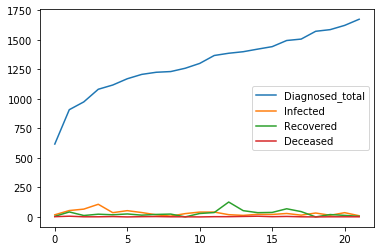

In [8]:
import matplotlib.pyplot as plt
data_total.plot()
plt.show()

Целта на моделот кој ќе го тренираме е предвидување на вкупниот број дијагностицирани за следен ден врз основа на дијагностицираните лица од претходните денови (датумите за кои имаме податоци). Тоа значи дека единствените потребни податоци за нашиот модел ќе бидат датумот и вкупниот број дијагностицирани за тој датум. Се креира финално податочно множество користејќи ги само овие два атрибути.

In [9]:
data_needed = pd.DataFrame({'Dates': data_total.Dates, 'Diagnosed_total': data_total.Diagnosed_total})
print(data_needed.head)

<bound method NDFrame.head of          Dates  Diagnosed_total
0   2020-04-08              617
1   2020-04-14              908
2   2020-04-15              974
3   2020-04-16             1081
4   2020-04-17             1117
5   2020-04-18             1170
6   2020-04-19             1207
7   2020-04-20             1225
8   2020-04-21             1231
9   2020-04-22             1259
10  2020-04-23             1300
11  2020-04-25             1367
12  2020-04-26             1386
13  2020-04-27             1399
14  2020-04-28             1421
15  2020-04-29             1442
16  2020-05-01             1494
17  2020-05-02             1506
18  2020-05-07             1572
19  2020-05-08             1586
20  2020-05-09             1622
21  2020-05-12             1674>


Во прилог е дадена визуелизацијата на односнот на двата атрибути.

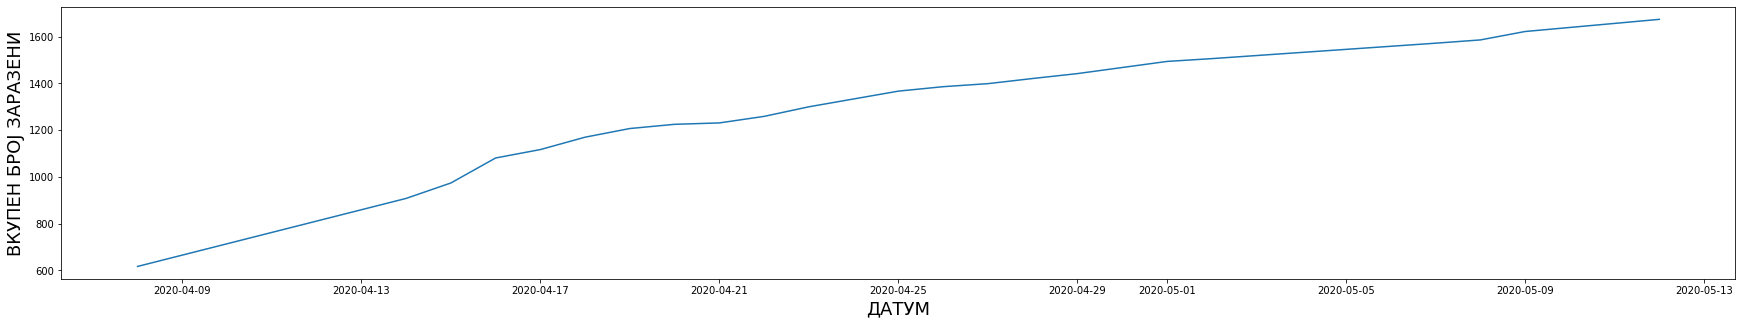

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,5))
plt.xlabel('ДАТУМ', fontsize=18)
plt.ylabel('ВКУПЕН БРОЈ ЗАРАЗЕНИ', fontsize=18)
plt.plot(data_needed.Dates, data_needed.Diagnosed_total)

Станува збор за <b>податочно множество со два атрибути: датум и број на заболени за тој датум</b>. Целта е да се предвиде бројот на заболени за некој иден непознат датум. Тоа значи дека датумите ќе ни претставуваат независните променливи (X), додека вкупниот број на заболени ќе претставува зависната променлива (Y). Со следните неколку ќелии код податоците се подготвуваат во форма која ќе биде погодна за тренирање на моделот. 

In [11]:
import warnings
warnings.filterwarnings("ignore")

In [12]:
data_needed.to_csv('data.csv', index=False)
import pandas as pd
dateparse = lambda Dates: pd.datetime.strptime(Dates, '%Y-%m-%d')

df = pd.read_csv("data.csv", parse_dates=True, index_col= [0], date_parser=dateparse )

df.head(22)

,Diagnosed_total
Dates,
2020-04-08,617
2020-04-14,908
2020-04-15,974
2020-04-16,1081
2020-04-17,1117
2020-04-18,1170
2020-04-19,1207
2020-04-20,1225
2020-04-21,1231


Датумите - независните променливи (index) и бројот на дијагностицирани - зависната променлива (value):

In [13]:
import matplotlib.pylab as plt
import numpy as np
print(df.index)
print(df.values)

DatetimeIndex(['2020-04-08', '2020-04-14', '2020-04-15', '2020-04-16',
               '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20',
               '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-25',
               '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29',
               '2020-05-01', '2020-05-02', '2020-05-07', '2020-05-08',
               '2020-05-09', '2020-05-12'],
              dtype='datetime64[ns]', name='Dates', freq=None)
[[ 617]
 [ 908]
 [ 974]
 [1081]
 [1117]
 [1170]
 [1207]
 [1225]
 [1231]
 [1259]
 [1300]
 [1367]
 [1386]
 [1399]
 [1421]
 [1442]
 [1494]
 [1506]
 [1572]
 [1586]
 [1622]
 [1674]]


### 3. ТРЕНИРАЊЕ МОДЕЛ

По детална анализа на податоците, може да се заклучи дека станува збор за временско-зависни податоци (зависат од конкретен датум). Според тоа, идеално решение за модел на овие податоци ќе биде <b> модел за Time Series Forecasting<b>.

За множеството со кое располагаме, по многубројни тестирања на различни, се одлучив за работа со <b> Autoregression Model (AR) </b>. Освен тоа што AR е Time Series Forecasting модел (добро работи со датуми), исто така овој модел дава прилично задоволителни резултати на модели со мал број атрибути (како во нашиот случај).
Сепак мора да се земе во предвид дека податочното множество со кое работиме е многу мало (22 записи).

Пред сѐ, податоците се трансформираат со пресметување на разлика меѓу нив, т.ш. секоја опсервација се трансформира. Моделот се тренира на 70% од податочното множество. Регресионите коефициенти учат од моделот и се користат подоцна за предикции. Во секој временски чекор на извршување на податоците, се креира предикција (yhat) користејќи ги регресионте коефициенти и се зачувува. 

Test RMSE: 30.456


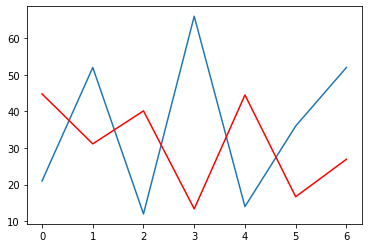

In [14]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
import numpy
from math import sqrt

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff)
 
def predict(coef, history):
    yhat = coef[0]
    for i in range(1, len(coef)):
        yhat += coef[i] * history[-i]
    return yhat
 
X = difference(df.values)
size = int(len(X) * 0.70)
train, test = X[0:size], X[size:]
# train autoregression
window = 4
model = AutoReg(train, lags=4)
model_fit = model.fit()
coef = model_fit.params
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
    yhat = predict(coef, history)
    obs = test[t]
    predictions.append(yhat)
    history.append(obs)
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Излезот од претходната ќелија (Test RMSE: 30.456) претставува <b>средната квадратна грешка на тренирачкото множество</b> на моделот. Добиениот график го претставува односот на вистинските опсервации (плавата линиија) и предикциите на моделот (црвената линија).

Моделот се зачувува за да не мора одново да се извршува ако има потреба повторно да се користи. Значи, прво моделот се тренира на сите дозволени податоци и потоа се зачувува како file.

In [16]:
from pandas import read_csv
from statsmodels.tsa.ar_model import AutoReg
import numpy

def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return numpy.array(diff) 

series = df
X = difference(series.values)
model = AutoReg(X, lags=6)
model_fit = model.fit()
model_fit.save('ar_model.pkl')
numpy.save('ar_data.npy', X)
numpy.save('ar_obs.npy', [series.values[-1]])

Со следната ќелија се прикажуваат добиените регресиони коефициенти од AR моделот после тренирањето и се прикажува последната опсервација од множеството: <b>за последниот достапен датум од тренирачкото множество 12.05.2020, бројот на вкупно дијагностицирани е 1674.</b>

In [17]:
# load the AR model from file
from statsmodels.tsa.ar_model import AutoRegResults
import numpy
loaded = AutoRegResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 8.25723547e+01 -5.34447475e-01 -2.02605108e-01 -4.36904407e-01
 -4.95122763e-01 -6.65689943e-02  9.93230770e-02]
[[1674]]


Финално, за датумот кој следува веднаш по датумот на последната опсервацијa (значи, 13.05.2020), моделот креира предикција за бројот на можни заболени за тој датум:

In [18]:
# load AR model from file and make a one-step prediction
from statsmodels.tsa.ar_model import AutoRegResults
import numpy

model = AutoRegResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')

# make prediction
predictions = model.predict(start=len(data), end=len(data))
# transform prediction
yhat = predictions[0] + last_ob[0]
print('Prediction: %f' % yhat)

Prediction: 1687.058510


### Проблемот е решен. 
За <b>новиот непознат датум 13.05.2020</b>, тренираниот AR модел предвиде <b>1687 вкупно дијагностицирани</b>. Според тоа, за 13.05.2020 би биле предвидени <b> 13 нови случаи </b> на COVID19 за тој ден.

Во прилог е оставено и додатно решение за датумите кои недостасуваат во податочното множество од периодот 2020-04-08 до 2020-05-12. Се додаваат датумите 13те датуми кои недостасуваат. Доколку решението на проблемот се продолжи со цел да се подобри моделот, може да се пополни бројот на дијагностицирани за овие датуми според одредени пресметани статистики (просек на пораст на заболените во секој нареден ден) и да се работи на малку поголемо податочно множество со 35 записи. Сепак, вакво решение не се бараше во зададената задача.

In [19]:
import pandas as pd

idx = pd.date_range('2020-04-08', '2020-05-12')

#[1674, 1622, 1586, 1506, 1572, 1494, 1442, 1421, 1399, 1300, 1386, 1367, 1259, 1170, 1225, 1231, 1207, 1117, 1081, 974, 908, 617]
diagnosed_total.sort()
data_filled = pd.Series({'2020-04-08': 617,'2020-04-14' : 908, '2020-04-15' : 974, '2020-04-16' : 1081, '2020-04-17' : 1117,
'2020-04-18': 1170,'2020-04-19' : 1207, '2020-04-20' : 1225, '2020-04-21' : 1231,  '2020-04-22' : 1259, '2020-04-23' : 1300,
               '2020-04-25' : 1367, '2020-04-26' : 1386, '2020-04-27' : 1399, '2020-04-28' : 1421, '2020-04-29' : 1442,
               '2020-05-01' : 1494, '2020-05-02' : 1506, '2020-05-07' : 1572, '2020-05-08' : 1586, '2020-05-09' : 1622,
            '2020-05-12' : 1674})
data_filled.index = pd.DatetimeIndex(data_filled.index)

mean=0
suma=0
vk=0
for j in range (len(diagnosed_total)-1):
    suma=(diagnosed_total[j+1]-diagnosed_total[j])
    vk=vk+suma

mean=int(vk/21)

data_filled = data_filled.reindex(idx, fill_value=0)
print(data_filled)
print(len(data_filled))

2020-04-08     617
2020-04-09       0
2020-04-10       0
2020-04-11       0
2020-04-12       0
2020-04-13       0
2020-04-14     908
2020-04-15     974
2020-04-16    1081
2020-04-17    1117
2020-04-18    1170
2020-04-19    1207
2020-04-20    1225
2020-04-21    1231
2020-04-22    1259
2020-04-23    1300
2020-04-24       0
2020-04-25    1367
2020-04-26    1386
2020-04-27    1399
2020-04-28    1421
2020-04-29    1442
2020-04-30       0
2020-05-01    1494
2020-05-02    1506
2020-05-03       0
2020-05-04       0
2020-05-05       0
2020-05-06       0
2020-05-07    1572
2020-05-08    1586
2020-05-09    1622
2020-05-10       0
2020-05-11       0
2020-05-12    1674
Freq: D, dtype: int64
35
